# Polynomial Regression Covid-19 di Indonesia

Model ini memberikan gambaran skenario terburuk (worst case scenario) untuk pedoman tindakan mitigasi risiko. Angka prediksi model ini digunakan sebagai angka harian yang harus dihindari oleh Indonesia dengan cara bersatu padu, berkolaborasi, gotong royong melakukan tindakan intervensi baik preventif maupun kuratif agar pandemi segera berakhir;

Pertama, Model lain yang memberikan skenario terbaik (best case scenario) yaitu model logistik. Model ini memberikan gambaran optimis bahwa pandemi Covid-19 ini akan berakhir dengan sendirinya (self-healing).

Kedua model harus dilihat keduanya dengan prinsip hopes for the best, prepares for the worst. Berharap yang terbaik dengan mempersiapkan kemungkinan yang terburuk. Jangan terlalu percaya diri dengan model optimis dan jangan takut dengan kemungkinan terburuk.

Sejenak, kita berikan apresiasi setinggi-tingginya bagi para pahlawan yang wafat dalam perjuangan melawan pandemi Covid-19 ini.

Mari tetap berharap dengan optimis dan tetap menjaga kewaspadaan dengan segala kerendahan hati.

In [35]:
import datetime
import operator
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import Markdown as md
from datetime import date, timedelta, datetime
from numpy import sqrt
from pandas import read_csv, to_datetime
from prettytable import PrettyTable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## DataFrame Akumulasi Kasus Positif Covid-19 di Indonesia

Kita buat DataFrame dengan tanggal 1 Maret 2020 sebagai index 0 di Indonesia (satu hari sebelum muncul kasus pertama di Depok).

In [38]:
df = read_csv('confirmed_acc.csv').iloc[39:]
df = df.reset_index()

last_date = to_datetime(df['date'].iloc[-1], format='%m/%d/%Y')
data = [
            ['4/11/2020', 3842],
            ['4/12/2020', 4241],
            ['4/13/2020', 4557],
            ['4/14/2020', 4839],
            ['4/15/2020', 5136],
            ['4/16/2020', 5527],
            ['4/17/2020', 5923],
            ['4/18/2020', 6248],
            ['4/19/2020', 6575],
            ['4/20/2020', 6760],
            ['4/21/2020', 7135],
            ['4/22/2020', 7418]
        ]

for k,v in data:
    if datetime.strptime(k, "%m/%d/%Y") > last_date:
        df = df.append({'date' : k, 'cases' : v} ,ignore_index=True)

# update last_date
last_date = to_datetime(df['date'].iloc[-1], format='%m/%d/%Y')

In [39]:
df['index'] = df.index
df.columns = ['indeks', 'tanggal', 'kasus']
df

,indeks,tanggal,kasus
0,0,3/1/2020,0
1,1,3/2/2020,2
2,2,3/3/2020,2
3,3,3/4/2020,2
4,4,3/5/2020,2
5,5,3/6/2020,4
6,6,3/7/2020,4
7,7,3/8/2020,6
8,8,3/9/2020,19
9,9,3/10/2020,27


### Model Polynomial Regression (Degree = 2)

In [55]:
degree = 2

x = df['indeks'].values.reshape(df['indeks'].size,1)
y = df['kasus'].values.reshape(df['kasus'].size,1)
polynomial_features= PolynomialFeatures(degree=degree)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

In [61]:
def forecast_days_after(n_days_after):
    # mengembalikan prediksi model regresi polynomial
    model_pred = model.predict(polynomial_features.fit_transform([[n_days_after]]))
    return '{:d}'.format(int(round(model_pred[0][0])))

start_date = to_datetime(df['tanggal'].iloc[0], format='%m/%d/%Y')
last_date = to_datetime(df['tanggal'].iloc[-1], format='%m/%d/%Y')

def display_forecast_days_after(n_days_after):
    # mengembalikan prediksi model regresi polynomial
    end_date = start_date + timedelta(days=n_days_after)
    model_pred = model.predict(polynomial_features.fit_transform([[n_days_after]]))
    return end_date.strftime("%d %B %Y"), '{:d}'.format(int(round(model_pred[0][0])))

def days_passed_timedelta():
    # mengembalikan hasil objek timedelta
    # berapa hari telah lewat sejak tanggal awal (start_date)
    last_date = to_datetime(df['tanggal'].iloc[-1], format='%m/%d/%Y')
    return last_date.date() - start_date.date() 

def date_days_after(n_days_after, date_format="%d %B %Y", **kwargs):
    tanggal = start_date + timedelta(days=n_days_after)
    return tanggal.date().strftime(date_format)

def display_tabel_prediksi(days_after):
    # tabel prediksi
    days_passed = days_passed_timedelta().days
    tabel_prediksi = PrettyTable(['ke-', 'tanggal','prediksi'])
    for x in range(days_passed+1,days_after+1):
        tabel_prediksi.add_row([x, date_days_after(x, date_format="%d-%m-%Y"), forecast_days_after(x)])
    print(tabel_prediksi)
    
def display_tabel_realisasi(lookback):
    # tabel prediksi
    days_passed = days_passed_timedelta().days
    tabel_realisasi = PrettyTable(['tanggal','pred', 'real', 'p-r'])
    for x in range(days_passed, days_passed-lookback+1, -1):
        pred_ = int(forecast_days_after(x))
        real_ = y[x][0]
        eval_ = pred_ - real_    
        tabel_realisasi.add_row([date_days_after(x, date_format="%d-%m-%Y"), pred_, real_, eval_])
    print(tabel_realisasi)
    
def display_equation(model):
    for coef in model.coef_:
        pass
    streq = "$y = " +str(model.intercept_[0])
    for i,c in enumerate(coef):
        j = len(coef)-i-1
        if abs(c) > c:
            sign = "-"
        else:
            sign = "+"
        if i > 1:
            streq += sign +str(abs(c)) + " \cdot x^{"+str(i)+"}"
        elif i == 1:
            streq += sign +str(abs(c)) + " \cdot x"

    streq =   streq + "$"
    return md(streq)

def display_widget_forecast_days_after():
    print('data terakhir adalah data hari ke-' + str(days_passed_timedelta().days) + \
          ', untuk mendapatkan prediksi ke depan geser slider ke kanan (gunakan tombol panah kanan -> pada keyboard):')
    @interact(x=(days_passed_timedelta().days+1, 365,1))
    def h(x=days_passed_timedelta().days+1):
        tabel_prediksi = PrettyTable(['hari ke-x', 'tanggal','prediksi akumulasi'])
        tabel_prediksi.add_row([x, date_days_after(x), forecast_days_after(x)])
        print(tabel_prediksi)

In [60]:
# tabel parameter
tabel_parameter = PrettyTable(['parameter', 'nilai'])
tabel_parameter.add_row(['polynomial\ndegree', degree])
tabel_parameter.add_row(['RMSE','{:.10}'.format(rmse)])
tabel_parameter.add_row(['R^2', '{:.10}'.format(r2)])

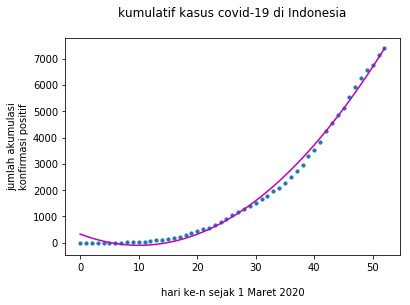

+------------+--------------+
| parameter  |    nilai     |
+------------+--------------+
| polynomial |      2       |
|   degree   |              |
|    RMSE    | 148.0167953  |
|    R^2     | 0.9957231057 |
+------------+--------------+


$y = 330.9123308557473-85.32437109074213 \cdot x+4.250790583199006 \cdot x^{2}$

In [64]:
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.title('kumulatif kasus covid-19 di Indonesia\n')
plt.xlabel('\nhari ke-n sejak 1 Maret 2020')
plt.ylabel('jumlah akumulasi\nkonfirmasi positif')

plt.plot(x, y_poly_pred, color='m')
plt.show()
print(tabel_parameter)
display_equation(model)

In [63]:
# tabel prediksi hingga hari ke 60
display_tabel_prediksi(60)

+-----+------------+----------+
| ke- |  tanggal   | prediksi |
+-----+------------+----------+
|  53 | 23-04-2020 |   7749   |
|  54 | 24-04-2020 |   8119   |
|  55 | 25-04-2020 |   8497   |
|  56 | 26-04-2020 |   8883   |
|  57 | 27-04-2020 |   9278   |
|  58 | 28-04-2020 |   9682   |
|  59 | 29-04-2020 |  10094   |
|  60 | 30-04-2020 |  10514   |
+-----+------------+----------+


In [22]:
display_forecast_days_after(106)

('15 June 2020', '39048')

### Realisasi Harian

In [ ]:
# tabel prediksi vs realisasi hingga 21 hari yang lalu
# p - r = negatif pertanda situasi lebih buruk daripada perkiraan
# p - r = positif pertanda situasi lebih baik daripada perkiraan

In [69]:
display_tabel_realisasi(54)

+------------+------+------+------+
|  tanggal   | pred | real | p-r  |
+------------+------+------+------+
| 22-04-2020 | 7388 | 7418 | -30  |
| 21-04-2020 | 7036 | 7135 | -99  |
| 20-04-2020 | 6692 | 6760 | -68  |
| 19-04-2020 | 6356 | 6575 | -219 |
| 18-04-2020 | 6029 | 6248 | -219 |
| 17-04-2020 | 5711 | 5923 | -212 |
| 16-04-2020 | 5401 | 5527 | -126 |
| 15-04-2020 | 5099 | 5136 | -37  |
| 14-04-2020 | 4806 | 4839 | -33  |
| 13-04-2020 | 4522 | 4557 | -35  |
| 12-04-2020 | 4246 | 4241 |  5   |
| 11-04-2020 | 3978 | 3842 | 136  |
| 10-04-2020 | 3719 | 3512 | 207  |
| 09-04-2020 | 3469 | 3293 | 176  |
| 08-04-2020 | 3227 | 2956 | 271  |
| 07-04-2020 | 2993 | 2738 | 255  |
| 06-04-2020 | 2768 | 2491 | 277  |
| 05-04-2020 | 2552 | 2273 | 279  |
| 04-04-2020 | 2344 | 2092 | 252  |
| 03-04-2020 | 2144 | 1986 | 158  |
| 02-04-2020 | 1953 | 1790 | 163  |
| 01-04-2020 | 1771 | 1677 |  94  |
| 31-03-2020 | 1597 | 1528 |  69  |
| 30-03-2020 | 1431 | 1414 |  17  |
| 29-03-2020 | 1274 | 1285 |

### Kesimpulan

Hasil analisis diatas tentu hanya mengandalkan variabel kasus di tiap harinya, hanya gambaran awal prediksi yang dibangun oleh model polynomial regression. Tentu beberapa variabel lain yang tidak dimasukkan kedalam analisisnya seperti kebijakan, aktifitas sosial, dan variabel lain yang tentu itu akan berpengaruh besar terhadap analisis tersebut, sehingga analisis diatas tidak memiliki gambaran utuh prediksi kapan puncak wabah akan benar-benar terjadi.

Analisis diatas hanya sebagian kontribusi yang bisa dikembangkan lebih baik nantinya.